In [5]:
import sqlite3
import pandas as pd

In [3]:
conn = sqlite3.connect('chinook_Sqlite.sqlite')

In [6]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)
print(tables)

             name
0           Album
1          Artist
2        Customer
3        Employee
4           Genre
5         Invoice
6     InvoiceLine
7       MediaType
8        Playlist
9   PlaylistTrack
10          Track


In [8]:
pd.read_sql_query("SELECT * FROM Album;", conn)


,AlbumId,Title,ArtistId
0,1,For Those About To Rock We Salute You,1
1,2,Balls to the Wall,2
2,3,Restless and Wild,2
3,4,Let There Be Rock,1
4,5,Big Ones,3
...,...,...,...
342,343,Respighi:Pines of Rome,226
343,344,Schubert: The Late String Quartets & String Qu...,272
344,345,Monteverdi: L'Orfeo,273
345,346,Mozart: Chamber Music,274


## Exploring tables and thier columns 

In [10]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE type='table';", conn)

for table in tables['name']:
    print(f"\nTable: {table}")
    cols = pd.read_sql_query(f"PRAGMA table_info({table});", conn)
    print(cols[['name', 'type']])



Table: Album
       name           type
0   AlbumId        INTEGER
1     Title  NVARCHAR(160)
2  ArtistId        INTEGER

Table: Artist
       name           type
0  ArtistId        INTEGER
1      Name  NVARCHAR(120)

Table: Customer
            name          type
0     CustomerId       INTEGER
1      FirstName  NVARCHAR(40)
2       LastName  NVARCHAR(20)
3        Company  NVARCHAR(80)
4        Address  NVARCHAR(70)
5           City  NVARCHAR(40)
6          State  NVARCHAR(40)
7        Country  NVARCHAR(40)
8     PostalCode  NVARCHAR(10)
9          Phone  NVARCHAR(24)
10           Fax  NVARCHAR(24)
11         Email  NVARCHAR(60)
12  SupportRepId       INTEGER

Table: Employee
          name          type
0   EmployeeId       INTEGER
1     LastName  NVARCHAR(20)
2    FirstName  NVARCHAR(20)
3        Title  NVARCHAR(30)
4    ReportsTo       INTEGER
5    BirthDate      DATETIME
6     HireDate      DATETIME
7      Address  NVARCHAR(70)
8         City  NVARCHAR(40)
9        State  NVARCHAR

## Top Selling Product

In [16]:
query = """
SELECT Title as Album, SUM(Quantity) AS UnitsSold, SUM(Quantity * InvoiceLine.UnitPrice) AS TotalRevenue
FROM InvoiceLine
JOIN Track ON InvoiceLine.TrackId = Track.TrackId
JOIN Album ON Track.AlbumId = Album.AlbumId
JOIN Artist ON Album.ArtistId = Artist.ArtistId
GROUP BY Album
ORDER BY TotalRevenue DESC
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Album,UnitsSold,TotalRevenue
0,"Battlestar Galactica (Classic), Season 1",18,35.82
1,"The Office, Season 3",16,31.84
2,Minha Historia,27,26.73
3,"Lost, Season 2",13,25.87
4,"Heroes, Season 1",13,25.87
5,Greatest Hits,26,25.74
6,Unplugged,25,24.75
7,"Battlestar Galactica, Season 3",12,23.88
8,"Lost, Season 3",11,21.89
9,Acústico,22,21.78


## Revenue per Region

In [17]:
query = """
SELECT BillingCountry AS Region, SUM(Total) AS Revenue
FROM Invoice
GROUP BY BillingCountry
ORDER BY Revenue DESC;
"""
pd.read_sql_query(query, conn)


,Region,Revenue
0,USA,523.06
1,Canada,303.96
2,France,195.10
3,Brazil,190.10
4,Germany,156.48
5,United Kingdom,112.86
6,Czech Republic,90.24
7,Portugal,77.24
8,India,75.26
9,Chile,46.62


## Monthly Performance

In [18]:
query = """
SELECT STRFTIME('%Y-%m', InvoiceDate) AS Month, SUM(Total) AS MonthlyRevenue
FROM Invoice
GROUP BY Month
ORDER BY Month;
"""
pd.read_sql_query(query, conn)


,Month,MonthlyRevenue
0,2009-01,35.64
1,2009-02,37.62
2,2009-03,37.62
3,2009-04,37.62
4,2009-05,37.62
5,2009-06,37.62
6,2009-07,37.62
7,2009-08,37.62
8,2009-09,37.62
9,2009-10,37.62


## Customer Purchases

In [19]:
query = """
SELECT c.FirstName || ' ' || c.LastName AS Customer,
       i.InvoiceId, i.InvoiceDate, i.Total, e.FirstName AS SalesAgent
FROM Invoice i
JOIN Customer c ON i.CustomerId = c.CustomerId
JOIN Employee e ON c.SupportRepId = e.EmployeeId
LIMIT 10;
"""
pd.read_sql_query(query, conn)


,Customer,InvoiceId,InvoiceDate,Total,SalesAgent
0,Leonie Köhler,1,2009-01-01 00:00:00,1.98,Steve
1,Bjørn Hansen,2,2009-01-02 00:00:00,3.96,Margaret
2,Daan Peeters,3,2009-01-03 00:00:00,5.94,Margaret
3,Mark Philips,4,2009-01-06 00:00:00,8.91,Steve
4,John Gordon,5,2009-01-11 00:00:00,13.86,Margaret
5,Fynn Zimmermann,6,2009-01-19 00:00:00,0.99,Jane
6,Niklas Schröder,7,2009-02-01 00:00:00,1.98,Jane
7,Dominique Lefebvre,8,2009-02-01 00:00:00,1.98,Margaret
8,Wyatt Girard,9,2009-02-02 00:00:00,3.96,Jane
9,Hugh O'Reilly,10,2009-02-03 00:00:00,5.94,Jane


## Top products per region

In [23]:
query = """
WITH ranked_data AS (
  SELECT 
    BillingCountry AS Region,
    Track.Name AS ProductName,
    SUM(InvoiceLine.UnitPrice * InvoiceLine.Quantity) AS TotalRevenue,
    RANK() OVER (PARTITION BY BillingCountry ORDER BY SUM(InvoiceLine.UnitPrice * InvoiceLine.Quantity) DESC) AS rnk
  FROM InvoiceLine
  JOIN Invoice ON Invoice.InvoiceId = InvoiceLine.InvoiceId
  JOIN Track ON Track.TrackId = InvoiceLine.TrackId
  GROUP BY Region, ProductName
)
SELECT *
FROM ranked_data
WHERE rnk == 1;
"""
pd.read_sql_query(query, conn)


,Region,ProductName,TotalRevenue,rnk
0,Argentina,Where The Wild Things Are,0.99,1
1,Argentina,Whatsername,0.99,1
2,Argentina,What Now My Love,0.99,1
3,Argentina,Wake Me Up When September Ends,0.99,1
4,Argentina,Times Like These,0.99,1
...,...,...,...,...
341,Spain,Arc,0.99,1
342,Sweden,Occupation / Precipice,1.99,1
343,USA,Gay Witch Hunt,3.98,1
344,USA,Branch Closing,3.98,1


## Visual Reporesentations

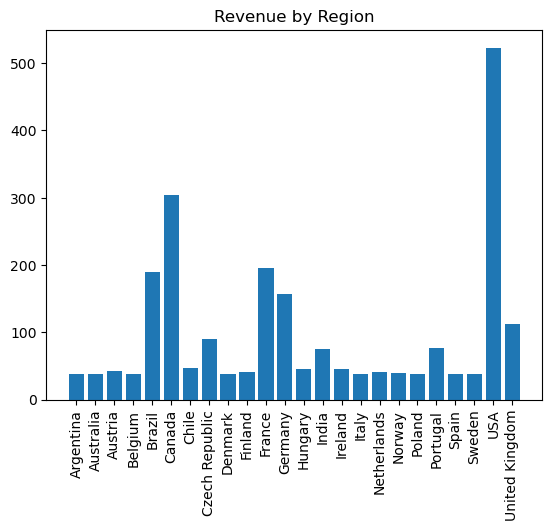

In [24]:
import matplotlib.pyplot as plt

df = pd.read_sql_query("SELECT BillingCountry, SUM(Total) AS Revenue FROM Invoice GROUP BY BillingCountry", conn)
plt.bar(df['BillingCountry'], df['Revenue'])
plt.xticks(rotation=90)
plt.title('Revenue by Region')
plt.show()


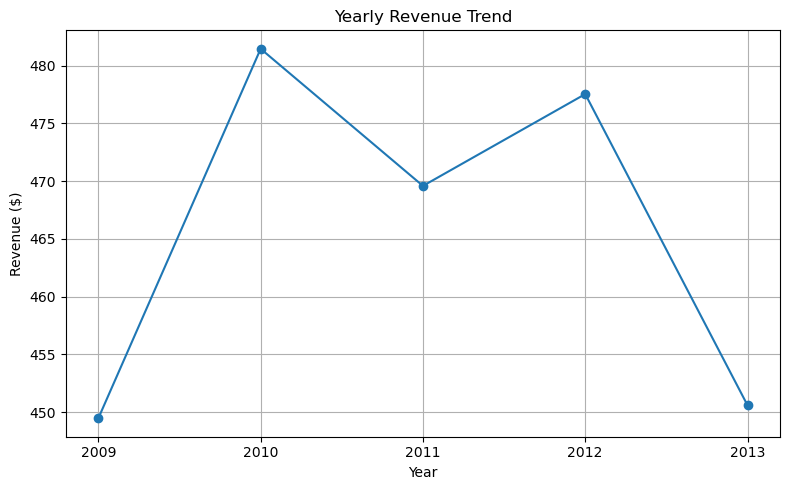

In [31]:
query = """
SELECT 
    STRFTIME('%Y', InvoiceDate) AS Year, 
    SUM(Total) AS YearlyRevenue
FROM Invoice
GROUP BY Year
ORDER BY Year;
"""
df_yearly = pd.read_sql_query(query, conn)

import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(df_yearly['Year'], df_yearly['YearlyRevenue'], marker='o')
plt.title('Yearly Revenue Trend')
plt.xlabel('Year')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


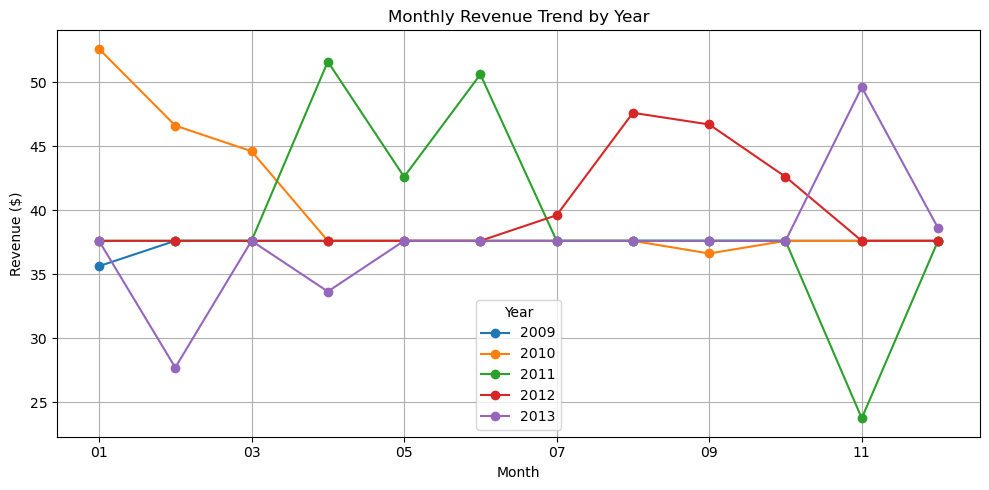

In [25]:
query = """
SELECT 
    STRFTIME('%Y', InvoiceDate) AS Year,
    STRFTIME('%m', InvoiceDate) AS Month,
    SUM(Total) AS Revenue
FROM Invoice
GROUP BY Year, Month
ORDER BY Year, Month;
"""
df = pd.read_sql_query(query, conn)

# Pivot for multi-line plot
df_pivot = df.pivot(index='Month', columns='Year', values='Revenue')

df_pivot.plot(kind='line', marker='o', figsize=(10,5))
plt.title('Monthly Revenue Trend by Year')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.tight_layout()
plt.show()
